# MNIST DATASET


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import CSVLogger, ModelCheckpoint, TensorBoard
from keras.datasets import mnist
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.optimizers.legacy import SGD

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

MNIST stands for Modified National Institute of Standards and Technology, which is a dataset of handwritten digits used for training and testing image processing systems.


The MNIST dataset is a collection of 70,000 handwritten digits (0-9) images, with 60,000 images for training and 10,000 images for testing. Each image is a 28x28 grayscale image, and the goal is to correctly classify each image into its corresponding digit class. The MNIST dataset is commonly used as a benchmark dataset for image classification tasks in machine learning and computer vision.


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

In [7]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

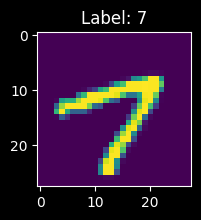

In [8]:
def plot_sample(index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X_train[index])
    plt.title("Label: {}".format(class_names[y_train[index]]))


plot_sample(101)

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
ann = Sequential(
    layers=[
        Flatten(input_shape=(28, 28), name="input_layer"),
        Dense(128, activation="relu", name="hidden_layer_1"),
        Dropout(0.2, name="dropout_layer_1"),
        Dense(64, activation="relu", name="hidden_layer_2"),
        Dropout(0.2, name="dropout_layer_2"),
        Dense(10, activation="softmax", name="output_layer"),
    ],
    name="ann",
)

2023-08-07 01:12:30.953844: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-08-07 01:12:30.953882: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-08-07 01:12:30.953897: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-08-07 01:12:30.954167: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-07 01:12:30.954215: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
ann.layers

In [12]:
ann.summary()

Model: "ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 dropout_layer_1 (Dropout)   (None, 128)               0         
                                                                 
 hidden_layer_2 (Dense)      (None, 64)                8256      
                                                                 
 dropout_layer_2 (Dropout)   (None, 64)                0         
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.

In [13]:
optimizer = SGD(learning_rate=0.001, momentum=0.9)
epochs = 10
ann.compile(
    optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [14]:
ann_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/mnist_ann",
    monitor="val_accuracy",
    save_best_only=True,
)
ann_tensorboard_callback = TensorBoard(
    log_dir="../Logs/mnist_ann_logs", histogram_freq=1, write_images=True
)
ann_csvlogger_callback = CSVLogger("../Logs/mnist_ann_logs.csv")
ann_history = ann.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[
        ann_checkpoint_callback,
        ann_tensorboard_callback,
        ann_csvlogger_callback,
    ],
)

Epoch 1/10


2023-08-07 01:12:32.179927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - ETA: 0s - loss: 1.4105 - accuracy: 0.5392

2023-08-07 01:12:40.941396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: ../Models/mnist_ann/assets


INFO:tensorflow:Assets written to: ../Models/mnist_ann/assets


422/422 [==============================] - 11s 23ms/step - loss: 1.4105 - accuracy: 0.5392 - val_loss: 0.6494 - val_accuracy: 0.8510
Epoch 2/10
422/422 [==============================] - ETA: 0s - loss: 0.7242 - accuracy: 0.7731INFO:tensorflow:Assets written to: ../Models/mnist_ann/assets


INFO:tensorflow:Assets written to: ../Models/mnist_ann/assets


422/422 [==============================] - 11s 26ms/step - loss: 0.7242 - accuracy: 0.7731 - val_loss: 0.4377 - val_accuracy: 0.8858
Epoch 3/10
421/422 [============================>.] - ETA: 0s - loss: 0.5882 - accuracy: 0.8184INFO:tensorflow:Assets written to: ../Models/mnist_ann/assets


INFO:tensorflow:Assets written to: ../Models/mnist_ann/assets


422/422 [==============================] - 13s 31ms/step - loss: 0.5884 - accuracy: 0.8184 - val_loss: 0.3688 - val_accuracy: 0.9013
Epoch 4/10
422/422 [==============================] - ETA: 0s - loss: 0.5191 - accuracy: 0.8419INFO:tensorflow:Assets written to: ../Models/mnist_ann/assets


INFO:tensorflow:Assets written to: ../Models/mnist_ann/assets


422/422 [==============================] - 17s 40ms/step - loss: 0.5191 - accuracy: 0.8419 - val_loss: 0.3351 - val_accuracy: 0.9092
Epoch 5/10
422/422 [==============================] - ETA: 0s - loss: 0.4860 - accuracy: 0.8542INFO:tensorflow:Assets written to: ../Models/mnist_ann/assets


INFO:tensorflow:Assets written to: ../Models/mnist_ann/assets


422/422 [==============================] - 21s 49ms/step - loss: 0.4860 - accuracy: 0.8542 - val_loss: 0.3167 - val_accuracy: 0.9142
Epoch 6/10
422/422 [==============================] - ETA: 0s - loss: 0.4647 - accuracy: 0.8613INFO:tensorflow:Assets written to: ../Models/mnist_ann/assets


INFO:tensorflow:Assets written to: ../Models/mnist_ann/assets


422/422 [==============================] - 21s 49ms/step - loss: 0.4647 - accuracy: 0.8613 - val_loss: 0.3031 - val_accuracy: 0.9183
Epoch 7/10
422/422 [==============================] - 16s 37ms/step - loss: 0.4503 - accuracy: 0.8680 - val_loss: 0.2955 - val_accuracy: 0.9182
Epoch 8/10
422/422 [==============================] - ETA: 0s - loss: 0.4404 - accuracy: 0.8690INFO:tensorflow:Assets written to: ../Models/mnist_ann/assets


INFO:tensorflow:Assets written to: ../Models/mnist_ann/assets


422/422 [==============================] - 20s 48ms/step - loss: 0.4404 - accuracy: 0.8690 - val_loss: 0.2909 - val_accuracy: 0.9200
Epoch 9/10
422/422 [==============================] - 23s 55ms/step - loss: 0.4321 - accuracy: 0.8737 - val_loss: 0.2845 - val_accuracy: 0.9200
Epoch 10/10
422/422 [==============================] - ETA: 0s - loss: 0.4259 - accuracy: 0.8756INFO:tensorflow:Assets written to: ../Models/mnist_ann/assets


INFO:tensorflow:Assets written to: ../Models/mnist_ann/assets


422/422 [==============================] - 18s 43ms/step - loss: 0.4259 - accuracy: 0.8756 - val_loss: 0.2797 - val_accuracy: 0.9227


In [15]:
ann_train_loss = ann_history.history["loss"]
ann_train_acc = ann_history.history["accuracy"]
ann_val_acc = ann_history.history["val_accuracy"]
ann_val_loss = ann_history.history["val_loss"]

print("Training loss:", np.mean(ann_train_loss))
print("Validation loss:", np.mean(ann_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(ann_train_acc), np.std(ann_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(ann_val_acc), np.std(ann_val_acc))
)

Training loss: 0.5941573739051819
Validation loss: 0.3561475872993469
0.817443 Training accuracy with a standard deviation of 0.097485
0.906067 Validation accuracy with a standard deviation of 0.021213


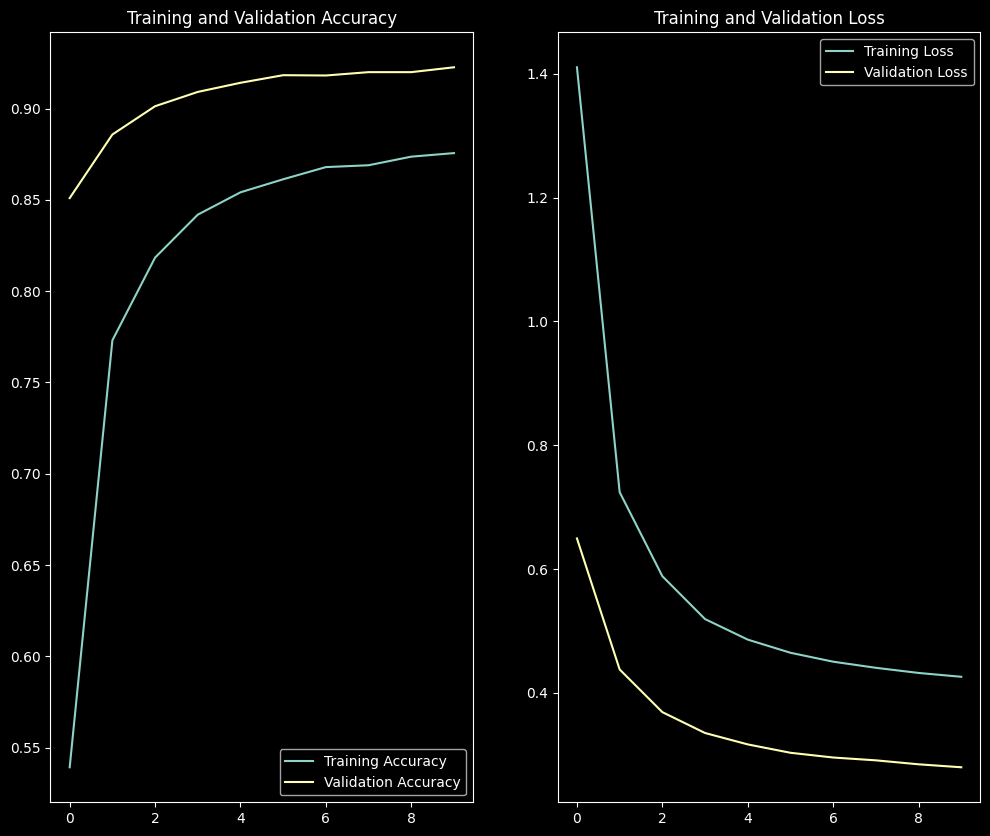

In [16]:
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, ann_train_acc, label="Training Accuracy")
plt.plot(epochs_range, ann_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, ann_train_loss, label="Training Loss")
plt.plot(epochs_range, ann_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("../Images/mnist_ann_acc_loss.png", bbox_inches="tight")

In [17]:
ann_test_loss, ann_test_accuracy = ann.evaluate(X_test, y_test)
print("Test loss:", ann_test_loss)
print("Test accuracy:", ann_test_accuracy)

313/313 [==============================] - 12s 36ms/step - loss: 0.3252 - accuracy: 0.9104
Test loss: 0.32520347833633423
Test accuracy: 0.9103999733924866


In [18]:
y_pred = ann.predict(X_test)

  2/313 [..............................] - ETA: 29s 

2023-08-07 01:15:40.028210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 5s 14ms/step


In [20]:
cnn = Sequential(
    layers=[
        Conv2D(
            filters=64,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            input_shape=(28, 28, 1),
            name="conv_layer_1",
        ),
        MaxPooling2D((2, 2), name="pooling_layer_1"),
        Dropout(0.2, name="dropout_layer_1"),
        Conv2D(
            filters=128,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            name="conv_layer_2",
        ),
        MaxPooling2D((2, 2), name="pooling_layer_2"),
        Dropout(0.2, name="dropout_layer_2"),
        Flatten(name="flatten_layer"),
        Dense(128, activation="relu", name="dense_layer_1"),
        Dense(10, activation="softmax", name="final_layer"),
    ],
    name="cnn",
)

In [21]:
cnn.layers

In [22]:
cnn.summary()

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_1 (Conv2D)       (None, 28, 28, 64)        640       
                                                                 
 pooling_layer_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_layer_1 (Dropout)   (None, 14, 14, 64)        0         
                                                                 
 conv_layer_2 (Conv2D)       (None, 14, 14, 128)       73856     
                                                                 
 pooling_layer_2 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 dropout_layer_2 (Dropout)   (None, 7, 7, 128)         0       

In [23]:
cnn.compile(
    optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [25]:
cnn_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/mnist_cnn",
    monitor="val_accuracy",
    save_best_only=True,
)
cnn_tensorboard_callback = TensorBoard(
    log_dir="../Logs/mnist_cnn_logs", histogram_freq=1, write_images=True
)
cnn_csvlogger_callback = CSVLogger("../Logs/mnist_cnn_logs.csv")

cnn_history = cnn.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[
        cnn_checkpoint_callback,
        cnn_tensorboard_callback,
        cnn_csvlogger_callback,
    ],
)

Epoch 1/10
422/422 [==============================] - ETA: 0s - loss: 0.4480 - accuracy: 0.8646

2023-08-07 01:19:57.091134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: ../Models/mnist_cnn/assets


INFO:tensorflow:Assets written to: ../Models/mnist_cnn/assets


422/422 [==============================] - 56s 128ms/step - loss: 0.4480 - accuracy: 0.8646 - val_loss: 0.2682 - val_accuracy: 0.9217
Epoch 2/10
422/422 [==============================] - ETA: 0s - loss: 0.3271 - accuracy: 0.9033INFO:tensorflow:Assets written to: ../Models/mnist_cnn/assets


INFO:tensorflow:Assets written to: ../Models/mnist_cnn/assets


422/422 [==============================] - 52s 123ms/step - loss: 0.3271 - accuracy: 0.9033 - val_loss: 0.2105 - val_accuracy: 0.9398
Epoch 3/10
422/422 [==============================] - ETA: 0s - loss: 0.2722 - accuracy: 0.9182INFO:tensorflow:Assets written to: ../Models/mnist_cnn/assets


INFO:tensorflow:Assets written to: ../Models/mnist_cnn/assets


422/422 [==============================] - 55s 130ms/step - loss: 0.2722 - accuracy: 0.9182 - val_loss: 0.1837 - val_accuracy: 0.9490
Epoch 4/10
422/422 [==============================] - ETA: 0s - loss: 0.2341 - accuracy: 0.9300INFO:tensorflow:Assets written to: ../Models/mnist_cnn/assets


INFO:tensorflow:Assets written to: ../Models/mnist_cnn/assets


422/422 [==============================] - 58s 138ms/step - loss: 0.2341 - accuracy: 0.9300 - val_loss: 0.1523 - val_accuracy: 0.9573
Epoch 5/10
422/422 [==============================] - ETA: 0s - loss: 0.2021 - accuracy: 0.9391INFO:tensorflow:Assets written to: ../Models/mnist_cnn/assets


INFO:tensorflow:Assets written to: ../Models/mnist_cnn/assets


422/422 [==============================] - 53s 125ms/step - loss: 0.2021 - accuracy: 0.9391 - val_loss: 0.1322 - val_accuracy: 0.9633
Epoch 6/10
422/422 [==============================] - ETA: 0s - loss: 0.1799 - accuracy: 0.9463INFO:tensorflow:Assets written to: ../Models/mnist_cnn/assets


INFO:tensorflow:Assets written to: ../Models/mnist_cnn/assets


422/422 [==============================] - 58s 138ms/step - loss: 0.1799 - accuracy: 0.9463 - val_loss: 0.1228 - val_accuracy: 0.9650
Epoch 7/10
422/422 [==============================] - ETA: 0s - loss: 0.1612 - accuracy: 0.9507INFO:tensorflow:Assets written to: ../Models/mnist_cnn/assets


INFO:tensorflow:Assets written to: ../Models/mnist_cnn/assets


422/422 [==============================] - 42s 98ms/step - loss: 0.1612 - accuracy: 0.9507 - val_loss: 0.1184 - val_accuracy: 0.9673
Epoch 8/10
422/422 [==============================] - ETA: 0s - loss: 0.1491 - accuracy: 0.9551INFO:tensorflow:Assets written to: ../Models/mnist_cnn/assets


INFO:tensorflow:Assets written to: ../Models/mnist_cnn/assets


422/422 [==============================] - 25s 58ms/step - loss: 0.1491 - accuracy: 0.9551 - val_loss: 0.1010 - val_accuracy: 0.9725
Epoch 9/10
422/422 [==============================] - ETA: 0s - loss: 0.1356 - accuracy: 0.9585INFO:tensorflow:Assets written to: ../Models/mnist_cnn/assets


INFO:tensorflow:Assets written to: ../Models/mnist_cnn/assets


422/422 [==============================] - 16s 39ms/step - loss: 0.1356 - accuracy: 0.9585 - val_loss: 0.0942 - val_accuracy: 0.9755
Epoch 10/10
422/422 [==============================] - 15s 37ms/step - loss: 0.1293 - accuracy: 0.9609 - val_loss: 0.0954 - val_accuracy: 0.9738


In [26]:
cnn_train_acc = cnn_history.history["accuracy"]
cnn_val_acc = cnn_history.history["val_accuracy"]
cnn_train_loss = cnn_history.history["loss"]
cnn_val_loss = cnn_history.history["val_loss"]


print("Training loss:", np.mean(cnn_train_loss))
print("Validation loss:", np.mean(cnn_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(cnn_train_acc), np.std(cnn_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(cnn_val_acc), np.std(cnn_val_acc))
)

Training loss: 0.22385056763887407
Validation loss: 0.1478643946349621
0.932672 Training accuracy with a standard deviation of 0.028686
0.958533 Validation accuracy with a standard deviation of 0.016311


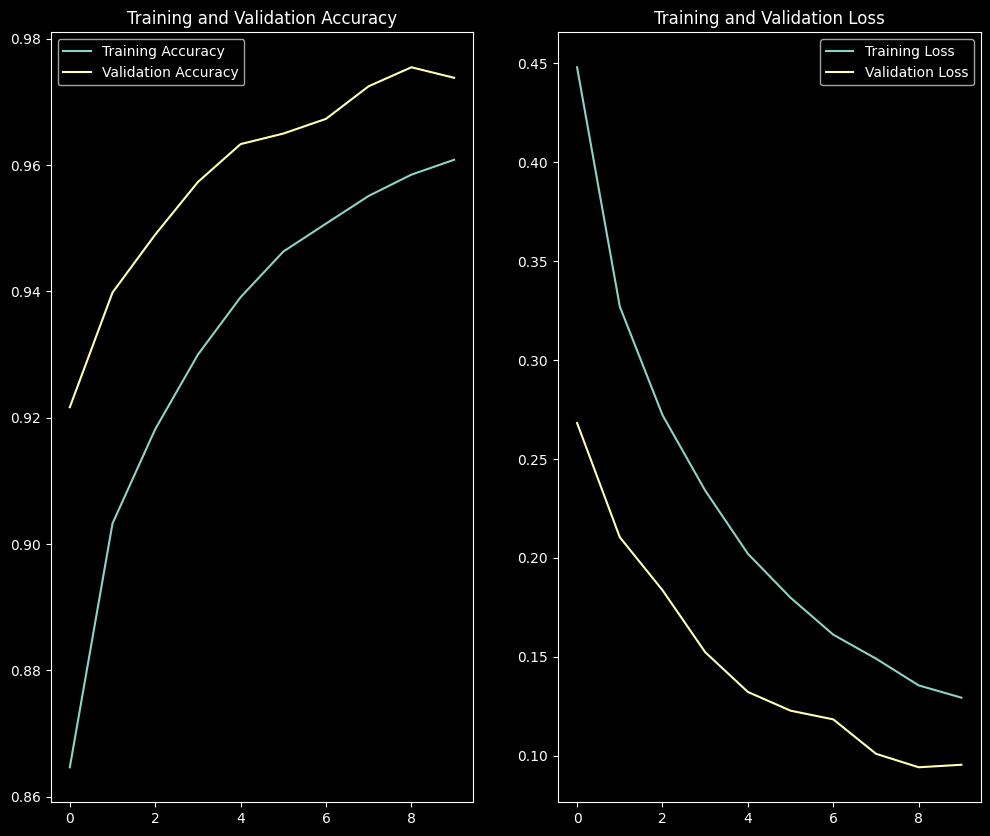

In [27]:
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, cnn_train_acc, label="Training Accuracy")
plt.plot(epochs_range, cnn_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, cnn_train_loss, label="Training Loss")
plt.plot(epochs_range, cnn_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("../Images/mnist_cnn_acc_loss.png", bbox_inches="tight")

In [28]:
cnn_test_loss, cnn_test_accuracy = cnn.evaluate(X_test, y_test)
print("Test loss:", cnn_test_loss)
print("Test accuracy:", cnn_test_accuracy)

313/313 [==============================] - 3s 8ms/step - loss: 0.0945 - accuracy: 0.9721
Test loss: 0.09454140812158585
Test accuracy: 0.972100019454956


In [29]:
y_pred = cnn.predict(X_test)

 38/313 [==>...........................] - ETA: 1s

2023-08-07 01:26:26.317572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step
